In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from kmodes.kmodes import KModes

In [2]:
# To see all columns in print

pd.options.display.max_columns = None

In [3]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,213687.0,Bebelallee/Meenkwiese,213855.0,Hamburg,Android,28.800000,1
1,108371,Stadthausbrücke / Neuer Wall,138379.0,Goldbekplatz / Semperstraße,140796.0,Hamburg,iPhone,27.050000,1
2,119829,Jungfernstieg / Ballindamm,131879.0,Hauptbahnhof Ost / Hachmannplatz,131873.0,Hamburg,iPhone,11.216667,1
3,116810,Hudtwalckerstraße / Bebelallee,138378.0,Kellinghusenstraße / Loogeplatz,140795.0,Hamburg,others,75.383333,1
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,131883.0,Feldstraße / Marktstraße,244093.0,Hamburg,Android,8.983333,1


In [4]:
# preprocessing to get the original data with all categorical variable

cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [5]:
cluster_2016['TECHNICAL_INCOME_CHANNEL'].unique()

array(['Android', 'iPhone', 'others', 'IVR', 'Windows', 'BlackBerry'],
      dtype=object)

In [6]:
cluster_2016['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [7]:
! pip install kmodes
! pip install --upgrade pip
! pip install category_encoders

Requirement already up-to-date: pip in ./anaconda3/lib/python3.6/site-packages (10.0.1)


## Why choose label encoding with other 3 other encoding

* Label encoding uses for features VEHICLE_HAL_ID,	START_RENTAL_ZONE,	END_RENTAL_ZONE.
* As these features have lots of classes. If we use other encoding the dimention of the dataset is too big too handle.
* For CITY_RENTAL_ZONE,	TECHNICAL_INCOME_CHANNEL,	Ride_Duration_new,	Month we choose 3 encoding as these have small classes.
* And these encoding doesn't produce sparse matrix. 


# Implementation

In [8]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [9]:
# converting all categorcal variable to label encoding

cluster_2016['START_RENTAL_ZONE']=cluster_2016['START_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['END_RENTAL_ZONE']=cluster_2016['END_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['VEHICLE_HAL_ID']=cluster_2016['VEHICLE_HAL_ID'].astype('category').cat.codes
#cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,1794,796,115,Hamburg,Android,28.800000,January
1,1574,683,318,Hamburg,iPhone,27.050000,January
2,6517,422,377,Hamburg,iPhone,11.216667,January
3,5127,401,437,Hamburg,others,75.383333,January
4,6984,94,266,Hamburg,Android,8.983333,January


# Approach #1 - Backward Difference Coding

In [10]:
import category_encoders as ce

# Get a new clean dataframe
# cluster_2016 = cluster_2016.select_dtypes(exclude=['float64'])

# Specify the columns to encode then fit and transform
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["CITY_RENTAL_ZONE","TECHNICAL_INCOME_CHANNEL","Month"])
encoder.fit(cluster_2016, verbose=1)

# Only display the first 5 columns for brevity
backd_df = encoder.transform(cluster_2016)
backd_df.head()

,col_CITY_RENTAL_ZONE_0,col_CITY_RENTAL_ZONE_1,col_CITY_RENTAL_ZONE_2,col_CITY_RENTAL_ZONE_3,col_CITY_RENTAL_ZONE_4,col_CITY_RENTAL_ZONE_5,col_CITY_RENTAL_ZONE_6,col_CITY_RENTAL_ZONE_7,col_CITY_RENTAL_ZONE_8,col_CITY_RENTAL_ZONE_9,col_CITY_RENTAL_ZONE_10,col_CITY_RENTAL_ZONE_11,col_CITY_RENTAL_ZONE_12,col_CITY_RENTAL_ZONE_13,col_CITY_RENTAL_ZONE_14,col_CITY_RENTAL_ZONE_15,col_CITY_RENTAL_ZONE_16,col_CITY_RENTAL_ZONE_17,col_CITY_RENTAL_ZONE_18,col_CITY_RENTAL_ZONE_19,col_CITY_RENTAL_ZONE_20,col_CITY_RENTAL_ZONE_21,col_CITY_RENTAL_ZONE_22,col_CITY_RENTAL_ZONE_23,col_CITY_RENTAL_ZONE_24,col_CITY_RENTAL_ZONE_25,col_CITY_RENTAL_ZONE_26,col_CITY_RENTAL_ZONE_27,col_CITY_RENTAL_ZONE_28,col_CITY_RENTAL_ZONE_29,col_CITY_RENTAL_ZONE_30,col_CITY_RENTAL_ZONE_31,col_CITY_RENTAL_ZONE_32,col_CITY_RENTAL_ZONE_33,col_CITY_RENTAL_ZONE_34,col_CITY_RENTAL_ZONE_35,col_CITY_RENTAL_ZONE_36,col_CITY_RENTAL_ZONE_37,col_CITY_RENTAL_ZONE_38,col_CITY_RENTAL_ZONE_39,col_CITY_RENTAL_ZONE_40,col_CITY_RENTAL_ZONE_41,col_CITY_RENTAL_ZONE_42,col_CITY_RENTAL_ZONE_43,col_CITY_RENTAL_ZONE_44,col_TECHNICAL_INCOME_CHANNEL_0,col_TECHNICAL_INCOME_CHANNEL_1,col_TECHNICAL_INCOME_CHANNEL_2,col_TECHNICAL_INCOME_CHANNEL_3,col_TECHNICAL_INCOME_CHANNEL_4,col_TECHNICAL_INCOME_CHANNEL_5,col_Month_0,col_Month_1,col_Month_2,col_Month_3,col_Month_4,col_Month_5,col_VEHICLE_HAL_ID,col_START_RENTAL_ZONE,col_END_RENTAL_ZONE,col_Ride_Duration_new
0,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,1794,796,115,28.800000
1,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,0.166667,-0.666667,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,1574,683,318,27.050000
2,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,0.166667,-0.666667,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,6517,422,377,11.216667
3,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.066667,-0.044444,-0.022222,1.0,0.166667,0.333333,-0.5,-0.333333,-0.166667,1.0,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,5127,401,437,75.383333
4,1.0,-0.977778,-0.955556,-0.933333,-0.911111,-0.888889,-0.866667,-0.844444,-0.822222,-0.8,-0.777778,-0.755556,-0.733333,-0.711111,-0.688889,-0.666667,-0.644444,-0.622222,-0.6,-0.577778,-0.555556,-0.533333,-0.511111,-0.488889,-0.466667,-0.444444,-0.422222,-0.4,-0.377778,-0.355556,-0.333333,-0.311111,-0.288889,-0.266667,-0.244444,-0.222222,-0.2,-0.177778,-0.155556,-0.133333,-0.111111,-0.088889,-0.06666

In [11]:
# To convert the value into numpy array

backd_df = backd_df.iloc[:, 0:].values

In [74]:
# printing the first array of features

backd_df[0]

array([ 1.00000000e+00, -9.77777778e-01, -9.55555556e-01, -9.33333333e-01,
       -9.11111111e-01, -8.88888889e-01, -8.66666667e-01, -8.44444444e-01,
       -8.22222222e-01, -8.00000000e-01, -7.77777778e-01, -7.55555556e-01,
       -7.33333333e-01, -7.11111111e-01, -6.88888889e-01, -6.66666667e-01,
       -6.44444444e-01, -6.22222222e-01, -6.00000000e-01, -5.77777778e-01,
       -5.55555556e-01, -5.33333333e-01, -5.11111111e-01, -4.88888889e-01,
       -4.66666667e-01, -4.44444444e-01, -4.22222222e-01, -4.00000000e-01,
       -3.77777778e-01, -3.55555556e-01, -3.33333333e-01, -3.11111111e-01,
       -2.88888889e-01, -2.66666667e-01, -2.44444444e-01, -2.22222222e-01,
       -2.00000000e-01, -1.77777778e-01, -1.55555556e-01, -1.33333333e-01,
       -1.11111111e-01, -8.88888889e-02, -6.66666667e-02, -4.44444444e-02,
       -2.22222222e-02,  1.00000000e+00, -8.33333333e-01, -6.66666667e-01,
       -5.00000000e-01, -3.33333333e-01, -1.66666667e-01,  1.00000000e+00,
       -8.33333333e-01, -

In [75]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost

kmode = KModes(n_clusters=11, init='Cao', verbose=2)

clusters = kmode.fit_predict(backd_df)
# cluster_2016['clusters'] = clusters


# Print cluster centroids of the trained model.
print(kmode.cluster_centroids_)

# Print training statistics
print(kmode.n_iter_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 468157, cost: 11884911.0
Run 1, iteration: 2/100, moves: 89367, cost: 11826180.0
Run 1, iteration: 3/100, moves: 35938, cost: 11826102.0
Run 1, iteration: 4/100, moves: 9, cost: 11826102.0
[[ 1.00000000e+00 -9.77777778e-01 -9.55555556e-01 -9.33333333e-01
  -9.11111111e-01 -8.88888889e-01 -8.66666667e-01 -8.44444444e-01
  -8.22222222e-01 -8.00000000e-01 -7.77777778e-01 -7.55555556e-01
  -7.33333333e-01 -7.11111111e-01 -6.88888889e-01 -6.66666667e-01
  -6.44444444e-01 -6.22222222e-01 -6.00000000e-01 -5.77777778e-01
  -5.55555556e-01 -5.33333333e-01 -5.11111111e-01 -4.88888889e-01
  -4.66666667e-01 -4.44444444e-01 -4.22222222e-01 -4.00000000e-01
  -3.77777778e-01 -3.55555556e-01 -3.33333333e-01 -3.11111111e-01
  -2.88888889e-01 -2.66666667e-01 -2.44444444e-01 -2.22222222e-01
  -2.00000000e-01 -1.77777778e-01 -1.55555556e-01 -1.33333333e-01
  -1.11111111e-01 -8.88888889e-02 -6.66

In [76]:
# cost in this encoding
print(kmode.cost_)

11826102.0


In [77]:
# predict all the labels

labels = kmode.labels_

In [78]:
len(kmode.labels_)

2000000

In [79]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(backd_df)

In [80]:
%matplotlib inline

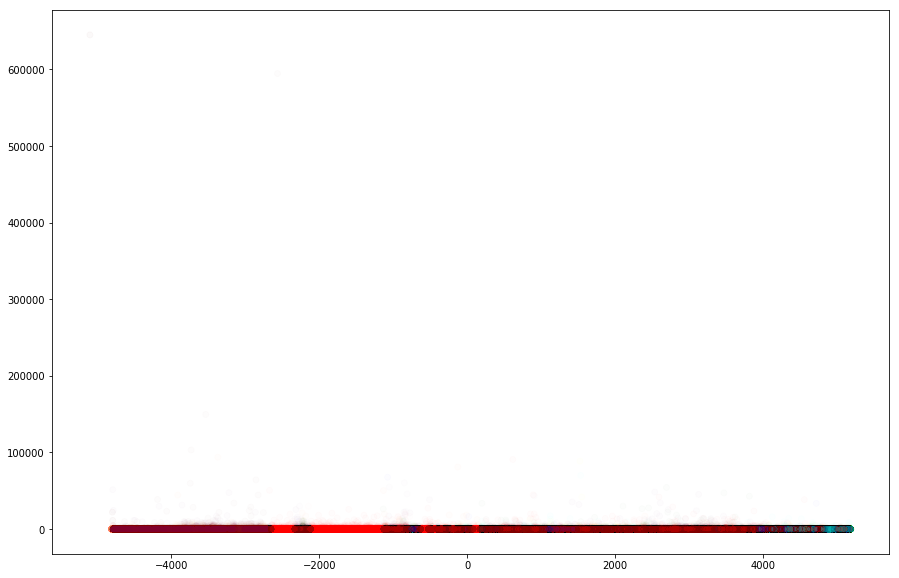

In [81]:
# plotting the all the clusters in 2D by using PCA

colors = ['red','blue','yellow','green','purple','cyan','brown','pink','coral','orange','violet']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in labels] ,label = labels, alpha=0.01)
plt.show()

In [82]:
labels = [colors[l_] for l_ in labels]

In [83]:
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    1153450
dtype: int64
blue 0    817
dtype: int64
yellow 0    104648
dtype: int64
green 0    90013
dtype: int64
purple 0    231340
dtype: int64
cyan 0    104355
dtype: int64
brown 0    200872
dtype: int64
pink 0    1407
dtype: int64
coral 0    833
dtype: int64
orange 0    111555
dtype: int64
violet 0    710
dtype: int64


# Approach #2 -Polynomial  Encoding

In [38]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [39]:
# converting all categorcal variable to dummy encoding

cluster_2016['START_RENTAL_ZONE']=cluster_2016['START_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['END_RENTAL_ZONE']=cluster_2016['END_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['VEHICLE_HAL_ID']=cluster_2016['VEHICLE_HAL_ID'].astype('category').cat.codes
#cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,1794,796,115,Hamburg,Android,28.800000,January
1,1574,683,318,Hamburg,iPhone,27.050000,January
2,6517,422,377,Hamburg,iPhone,11.216667,January
3,5127,401,437,Hamburg,others,75.383333,January
4,6984,94,266,Hamburg,Android,8.983333,January


In [40]:
import category_encoders as ce
encoder = ce.polynomial.PolynomialEncoder(cols=["CITY_RENTAL_ZONE","TECHNICAL_INCOME_CHANNEL","Month"])
encoder.fit(cluster_2016, verbose=1)
poly_df = encoder.transform(cluster_2016)

In [41]:
poly_df.head()

,col_CITY_RENTAL_ZONE_0,col_CITY_RENTAL_ZONE_1,col_CITY_RENTAL_ZONE_2,col_CITY_RENTAL_ZONE_3,col_CITY_RENTAL_ZONE_4,col_CITY_RENTAL_ZONE_5,col_CITY_RENTAL_ZONE_6,col_CITY_RENTAL_ZONE_7,col_CITY_RENTAL_ZONE_8,col_CITY_RENTAL_ZONE_9,col_CITY_RENTAL_ZONE_10,col_CITY_RENTAL_ZONE_11,col_CITY_RENTAL_ZONE_12,col_CITY_RENTAL_ZONE_13,col_CITY_RENTAL_ZONE_14,col_CITY_RENTAL_ZONE_15,col_CITY_RENTAL_ZONE_16,col_CITY_RENTAL_ZONE_17,col_CITY_RENTAL_ZONE_18,col_CITY_RENTAL_ZONE_19,col_CITY_RENTAL_ZONE_20,col_CITY_RENTAL_ZONE_21,col_CITY_RENTAL_ZONE_22,col_CITY_RENTAL_ZONE_23,col_CITY_RENTAL_ZONE_24,col_CITY_RENTAL_ZONE_25,col_CITY_RENTAL_ZONE_26,col_CITY_RENTAL_ZONE_27,col_CITY_RENTAL_ZONE_28,col_CITY_RENTAL_ZONE_29,col_CITY_RENTAL_ZONE_30,col_CITY_RENTAL_ZONE_31,col_CITY_RENTAL_ZONE_32,col_CITY_RENTAL_ZONE_33,col_CITY_RENTAL_ZONE_34,col_CITY_RENTAL_ZONE_35,col_CITY_RENTAL_ZONE_36,col_CITY_RENTAL_ZONE_37,col_CITY_RENTAL_ZONE_38,col_CITY_RENTAL_ZONE_39,col_CITY_RENTAL_ZONE_40,col_CITY_RENTAL_ZONE_41,col_CITY_RENTAL_ZONE_42,col_CITY_RENTAL_ZONE_43,col_CITY_RENTAL_ZONE_44,col_TECHNICAL_INCOME_CHANNEL_0,col_TECHNICAL_INCOME_CHANNEL_1,col_TECHNICAL_INCOME_CHANNEL_2,col_TECHNICAL_INCOME_CHANNEL_3,col_TECHNICAL_INCOME_CHANNEL_4,col_TECHNICAL_INCOME_CHANNEL_5,col_Month_0,col_Month_1,col_Month_2,col_Month_3,col_Month_4,col_Month_5,col_VEHICLE_HAL_ID,col_START_RENTAL_ZONE,col_END_RENTAL_ZONE,col_Ride_Duration_new
0,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1794,796,115,28.800000
1,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.358569,-0.109109,0.521749,-0.566947,0.314970,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,1574,683,318,27.050000
2,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.358569,-0.109109,0.521749,-0.566947,0.314970,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,6517,422,377,11.216667
3,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0.001619,0.000912,-0.000497,0.000262,-0.000134,0.000066,-0.000031,0.000014,-0.000006,0.000003,-0.000001,3.875912e-07,-1.389398e-07,4.705947e-08,-1.487207e-08,4.326767e-09,-1.137028e-09,2.039489e-10,-1.916536e-10,1.269234e-10,7.651156e-13,2.336223e-11,1.0,-0.119523,-0.436436,0.298142,0.377964,-0.629941,1.0,-0.597614,0.545545,-0.372678,0.188982,-0.062994,5127,401,437,75.383333
4,1.0,-0.252523,0.311825,-0.345127,0.357969,-0.353969,0.336502,-0.308996,0.274849,-0.237247,0.198969,-0.162251,0.12871,-0.099354,0.074637,-0.054566,0.038818,-0.026865,0.018083,-0.011833,0.007524,-0.004647,0.002785,-0

In [42]:
# To convert the value into numpy array

poly_df = poly_df.iloc[:, 0:].values

In [71]:
poly_df[0]

array([ 1.00000000e+00, -2.52523496e-01,  3.11825384e-01, -3.45127457e-01,
        3.57969178e-01, -3.53969396e-01,  3.36502476e-01, -3.08995635e-01,
        2.74848963e-01, -2.37247046e-01,  1.98969421e-01, -1.62250503e-01,
        1.28709819e-01, -9.93538158e-02,  7.46374012e-02, -5.45661559e-02,
        3.88180365e-02, -2.68654294e-02,  1.80830729e-02, -1.18331498e-02,
        7.52442493e-03, -4.64674955e-03,  2.78514501e-03, -1.61900194e-03,
        9.11972154e-04, -4.97318484e-04,  2.62261844e-04, -1.33582175e-04,
        6.56247157e-05, -3.10456012e-05,  1.41174053e-05, -6.15771604e-06,
        2.56995408e-06, -1.02336556e-06,  3.87591215e-07, -1.38939759e-07,
        4.70594706e-08, -1.48720653e-08,  4.32676668e-09, -1.13702769e-09,
        2.03948949e-10, -1.91653581e-10,  1.26923384e-10,  7.65115610e-13,
        2.33622288e-11,  1.00000000e+00, -5.97614305e-01,  5.45544726e-01,
       -3.72677996e-01,  1.88982237e-01, -6.29940788e-02,  1.00000000e+00,
       -5.97614305e-01,  

In [84]:
kmode = KModes(n_clusters=11, init='Cao', verbose=2)

clusters = kmode.fit_predict(poly_df)

# Print cluster centroids of the trained model.
print(kmode.cluster_centroids_)

# Print training statistics
print(kmode.n_iter_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 65907, cost: 23306928.0
Run 1, iteration: 2/100, moves: 26, cost: 23306928.0
[[ 1.00000000e+00 -2.52523496e-01  3.11825384e-01 -3.45127457e-01
   3.57969178e-01 -3.53969396e-01  3.36502476e-01 -3.08995635e-01
   2.74848963e-01 -2.37247046e-01  1.98969421e-01 -1.62250503e-01
   1.28709819e-01 -9.93538158e-02  7.46374012e-02 -5.45661559e-02
   3.88180365e-02 -2.68654294e-02  1.80830729e-02 -1.18331498e-02
   7.52442493e-03 -4.64674955e-03  2.78514501e-03 -1.61900194e-03
   9.11972154e-04 -4.97318484e-04  2.62261844e-04 -1.33582175e-04
   6.56247157e-05 -3.10456012e-05  1.41174053e-05 -6.15771604e-06
   2.56995408e-06 -1.02336556e-06  3.87591215e-07 -1.38939759e-07
   4.70594706e-08 -1.48720653e-08  4.32676668e-09 -1.13702769e-09
   2.03948949e-10 -1.91653581e-10  1.26923384e-10  7.65115610e-13
   2.33622288e-11  1.00000000e+00 -3.58568583e-01 -1.09108945e-01
   5.21749195e-01 -

In [85]:
# cost in this encoding
print(kmode.cost_)

23306928.0


In [86]:
# predict all the labels

labels = kmode.labels_

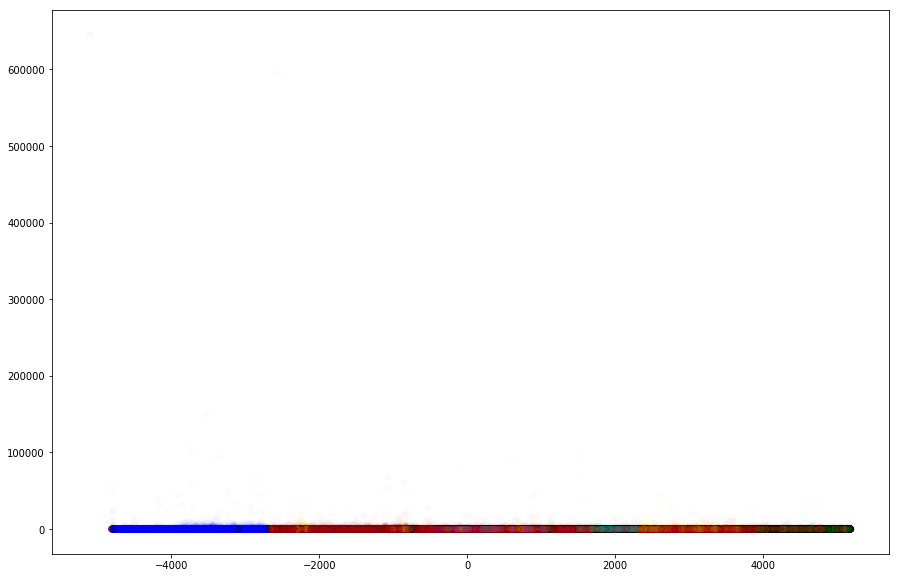

In [87]:
%matplotlib inline
# plotting the all the clusters in 2D by using PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(poly_df)

colors = ['red','blue','yellow','green','purple','cyan','brown','pink','coral','orange','violet']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in labels] ,label = labels, alpha=0.01)
plt.show()

In [88]:
labels = [colors[l_] for l_ in labels]

In [89]:

# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    590527
dtype: int64
blue 0    333009
dtype: int64
yellow 0    131114
dtype: int64
green 0    123590
dtype: int64
purple 0    308139
dtype: int64
cyan 0    82524
dtype: int64
brown 0    219515
dtype: int64
pink 0    50978
dtype: int64
coral 0    93783
dtype: int64
orange 0    4553
dtype: int64
violet 0    62268
dtype: int64


# Approach #3 -- Helmert Coding

In [48]:
cluster_2016 = pd.read_csv('cluster_data_less.csv',index_col = False)
# dropping  the index column
cluster_2016 = cluster_2016.drop(columns=['Unnamed: 0'])
cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE_HAL_ID', 'END_RENTAL_ZONE_HAL_ID'])
cleanup_months = {"Month":     {6:'June',5:'May',4:"April",3:'March' ,2: "February",1:"January"}}
cluster_2016.replace(cleanup_months, inplace=True)
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,108647,Überseering/Mexikoring,Bebelallee/Meenkwiese,Hamburg,Android,28.800000,January
1,108371,Stadthausbrücke / Neuer Wall,Goldbekplatz / Semperstraße,Hamburg,iPhone,27.050000,January
2,119829,Jungfernstieg / Ballindamm,Hauptbahnhof Ost / Hachmannplatz,Hamburg,iPhone,11.216667,January
3,116810,Hudtwalckerstraße / Bebelallee,Kellinghusenstraße / Loogeplatz,Hamburg,others,75.383333,January
4,120345,Bahnhof Dammtor Nord // Theodor-Heuss-Platz,Feldstraße / Marktstraße,Hamburg,Android,8.983333,January


In [49]:
# converting all categorcal variable to dummy encoding

cluster_2016['START_RENTAL_ZONE']=cluster_2016['START_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['END_RENTAL_ZONE']=cluster_2016['END_RENTAL_ZONE'].astype('category').cat.codes
cluster_2016['VEHICLE_HAL_ID']=cluster_2016['VEHICLE_HAL_ID'].astype('category').cat.codes
#cluster_2016 = cluster_2016.drop(columns=['START_RENTAL_ZONE', 'END_RENTAL_ZONE'])
cluster_2016.head()

,VEHICLE_HAL_ID,START_RENTAL_ZONE,END_RENTAL_ZONE,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,Ride_Duration_new,Month
0,1794,796,115,Hamburg,Android,28.800000,January
1,1574,683,318,Hamburg,iPhone,27.050000,January
2,6517,422,377,Hamburg,iPhone,11.216667,January
3,5127,401,437,Hamburg,others,75.383333,January
4,6984,94,266,Hamburg,Android,8.983333,January


In [50]:
import category_encoders as ce
encoder = ce.helmert.HelmertEncoder(cols=["CITY_RENTAL_ZONE","TECHNICAL_INCOME_CHANNEL","Month"])
encoder.fit(cluster_2016, verbose=1)
helm_df = encoder.transform(cluster_2016)

In [51]:
helm_df.head()

,col_CITY_RENTAL_ZONE_0,col_CITY_RENTAL_ZONE_1,col_CITY_RENTAL_ZONE_2,col_CITY_RENTAL_ZONE_3,col_CITY_RENTAL_ZONE_4,col_CITY_RENTAL_ZONE_5,col_CITY_RENTAL_ZONE_6,col_CITY_RENTAL_ZONE_7,col_CITY_RENTAL_ZONE_8,col_CITY_RENTAL_ZONE_9,col_CITY_RENTAL_ZONE_10,col_CITY_RENTAL_ZONE_11,col_CITY_RENTAL_ZONE_12,col_CITY_RENTAL_ZONE_13,col_CITY_RENTAL_ZONE_14,col_CITY_RENTAL_ZONE_15,col_CITY_RENTAL_ZONE_16,col_CITY_RENTAL_ZONE_17,col_CITY_RENTAL_ZONE_18,col_CITY_RENTAL_ZONE_19,col_CITY_RENTAL_ZONE_20,col_CITY_RENTAL_ZONE_21,col_CITY_RENTAL_ZONE_22,col_CITY_RENTAL_ZONE_23,col_CITY_RENTAL_ZONE_24,col_CITY_RENTAL_ZONE_25,col_CITY_RENTAL_ZONE_26,col_CITY_RENTAL_ZONE_27,col_CITY_RENTAL_ZONE_28,col_CITY_RENTAL_ZONE_29,col_CITY_RENTAL_ZONE_30,col_CITY_RENTAL_ZONE_31,col_CITY_RENTAL_ZONE_32,col_CITY_RENTAL_ZONE_33,col_CITY_RENTAL_ZONE_34,col_CITY_RENTAL_ZONE_35,col_CITY_RENTAL_ZONE_36,col_CITY_RENTAL_ZONE_37,col_CITY_RENTAL_ZONE_38,col_CITY_RENTAL_ZONE_39,col_CITY_RENTAL_ZONE_40,col_CITY_RENTAL_ZONE_41,col_CITY_RENTAL_ZONE_42,col_CITY_RENTAL_ZONE_43,col_CITY_RENTAL_ZONE_44,col_TECHNICAL_INCOME_CHANNEL_0,col_TECHNICAL_INCOME_CHANNEL_1,col_TECHNICAL_INCOME_CHANNEL_2,col_TECHNICAL_INCOME_CHANNEL_3,col_TECHNICAL_INCOME_CHANNEL_4,col_TECHNICAL_INCOME_CHANNEL_5,col_Month_0,col_Month_1,col_Month_2,col_Month_3,col_Month_4,col_Month_5,col_VEHICLE_HAL_ID,col_START_RENTAL_ZONE,col_END_RENTAL_ZONE,col_Ride_Duration_new
0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1794,796,115,28.800000
1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1574,683,318,27.050000
2,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6517,422,377,11.216667
3,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,2.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5127,401,437,75.383333
4,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6984,94,266,8.983333


In [52]:
# To convert the value into numpy array

helm_df = helm_df.iloc[:, 0:].values
helm_df[0]

array([ 1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
        1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00,  1.000e+00, -1.000e+00, -1.000e+00, -1.000e+00,
       -1.000e+00, -1.000e+00,  1.794e+03,  7.960e+02,  1.150e+02,
        2.880e+01])

In [53]:
# with 'Cao' initilization as it is a optimized initializer and verbose is information to see.
# no of cluster is 7 according elbow method with lower cost
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=7, init='Cao', verbose=2)

# fit the data in numpy array format , and given all the  categorical features index
clusters = kproto.fit(helm_df, categorical=[0, 1, 2, 3, 4, 6])

# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)

# Print training statistics
print(kproto.n_iter_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 351376, ncost: 1968028003276.718
Run: 1, iteration: 2/100, moves: 141253, ncost: 1947299842841.7034
Run: 1, iteration: 3/100, moves: 97750, ncost: 1937780186679.952
Run: 1, iteration: 4/100, moves: 72141, ncost: 1932617416600.5193
Run: 1, iteration: 5/100, moves: 50644, ncost: 1930031794803.8835
Run: 1, iteration: 6/100, moves: 40779, ncost: 1928211882550.071
Run: 1, iteration: 7/100, moves: 27987, ncost: 1927380379380.579
Run: 1, iteration: 8/100, moves: 19875, ncost: 1926995943447.7485
Run: 1, iteration: 9/100, moves: 13531, ncost: 1926823310955.7366
Run: 1, iteration: 10/100, moves: 10832, ncost: 1926674719537.378
Run: 1, iteration: 11/100, moves: 11232, ncost: 1926515249364.2874
Run: 1, iteration: 12/100, moves: 9510, ncost: 1926422974164.0

In [54]:
# cost in this encoding
print(kmode.cost_)

23306928.0


In [55]:
# predict all the labels

labels = kmode.labels_

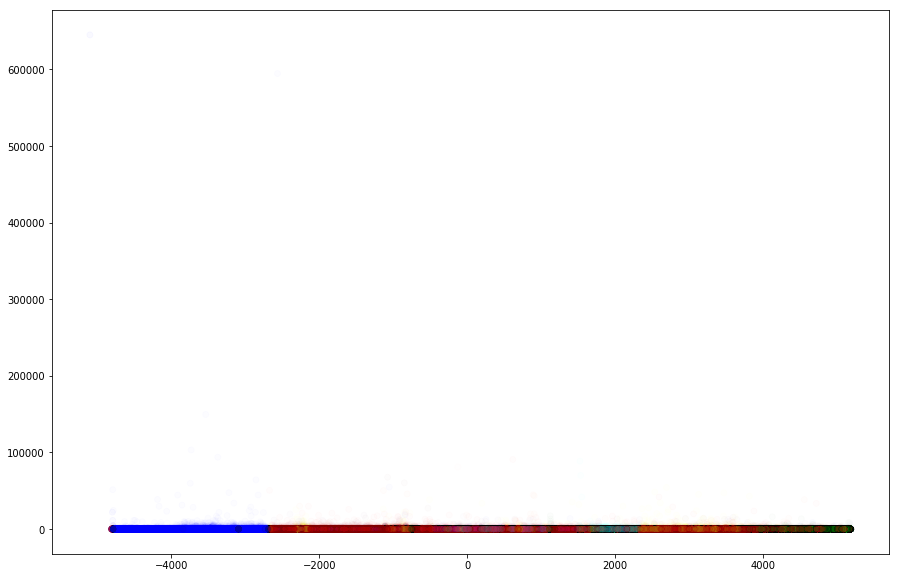

In [57]:
%matplotlib inline
# plotting the all the clusters in 2D by using PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(helm_df)

colors = ['red','blue','yellow','green','purple','cyan','brown','pink','coral','orange','violet']
fig = plt.figure(figsize = (15,10))
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=[colors[l_] for l_ in labels] ,label = labels, alpha=0.01)
plt.show()

In [58]:
labels = [colors[l_] for l_ in labels]
# cluster distribution for the dataset

lab = pd.DataFrame(labels)
for col in colors:
    print(col, str(lab[lab[0]==col].count()))

red 0    590527
dtype: int64
blue 0    333009
dtype: int64
yellow 0    131114
dtype: int64
green 0    123590
dtype: int64
purple 0    308139
dtype: int64
cyan 0    82524
dtype: int64
brown 0    219515
dtype: int64
pink 0    50978
dtype: int64
coral 0    93783
dtype: int64
orange 0    4553
dtype: int64
violet 0    62268
dtype: int64
